# Part 1 of CW

In [26]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

import pandas as pd

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [27]:
data = sio.loadmat('AMZN_20141103.mat')

In [28]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [29]:
#MIDPRICE MICROPRICE and SPREAD

midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

In [45]:
midprice
mdp = pd.DataFrame(midprice)
mdp.describe()

,0
count,234000.000000
mean,306.234948
std,0.971306
min,303.265000
25%,305.525000
50%,306.430000
75%,306.980000
max,307.985000


In [46]:
306.980000 - 305.525000

1.455000000000041

In [47]:
mdp.median()

0    306.43
dtype: float64

In [44]:
microprice
mcp = pd.DataFrame(microprice)
mcp.describe()

,0
count,234000.000000
mean,306.230662
std,0.972256
min,303.251538
25%,305.521239
50%,306.424921
75%,306.970000
max,307.987500


In [48]:
306.97 - 305.521239

1.4487610000000473

In [42]:
spread
spread_df = pd.DataFrame(spread)
spread_df.describe()

,0
count,234000.000000
mean,0.123988
std,0.055254
min,0.010000
25%,0.090000
50%,0.120000
75%,0.150000
max,0.600000


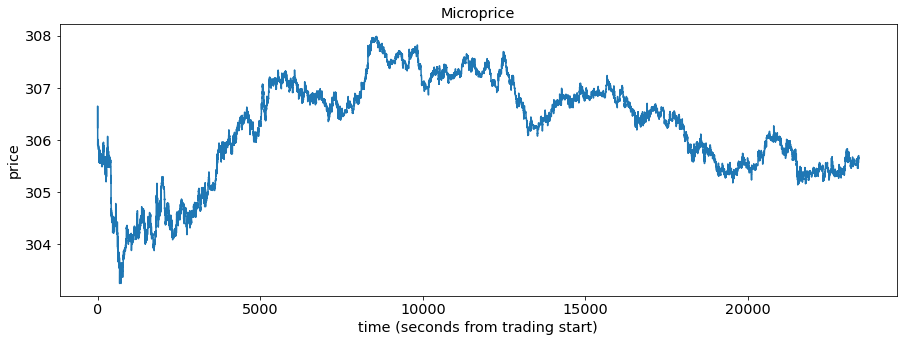

In [33]:
#plot of microprice

plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

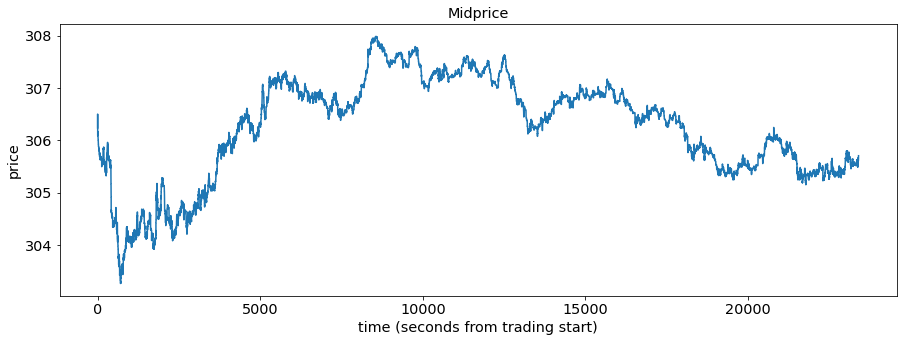

In [34]:
#plot of midprice???

plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

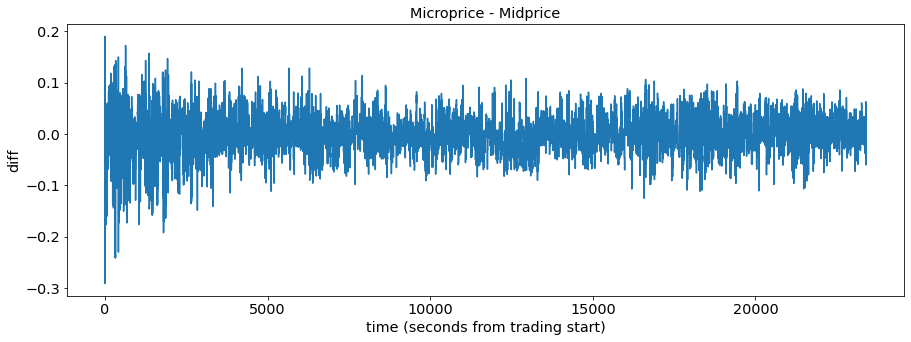

In [35]:
# plot the difference between micro and midprice

plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

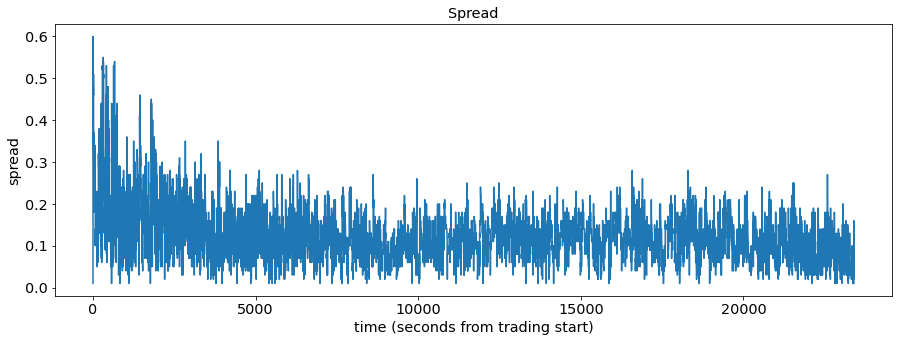

In [36]:
#Plot spread

plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

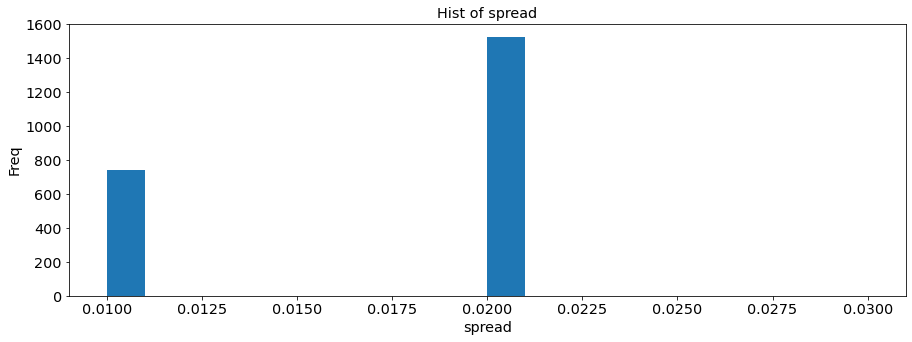

In [37]:
#plot a histogram of the spread??

plt.hist(spread,bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("Hist of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

# Volume Imbalance

In [38]:
# what is rho again?? The ratio of quoted imbalance to the total quoted volume

rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T
rho

array([[ 0.77728285],
       [-0.12359551],
       [-0.12359551],
       ...,
       [-0.79231568],
       [-0.79231568],
       [-0.79231568]])

In [39]:
df = pd.DataFrame(rho)
df

,0
0,0.777283
1,-0.123596
2,-0.123596
3,0.680672
4,0.683333
...,...
233995,-0.792316
233996,-0.792316
233997,-0.792316
233998,-0.792316


In [41]:
df.describe()

,0
count,234000.000000
mean,-0.050551
std,0.486801
min,-0.998668
25%,-0.356913
50%,0.000000
75%,0.324503
max,0.996672


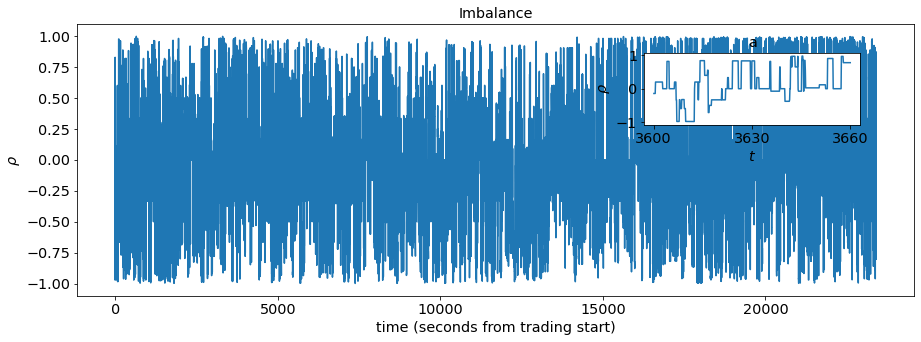

In [14]:
#plot, how does the volume imbalance over time

plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

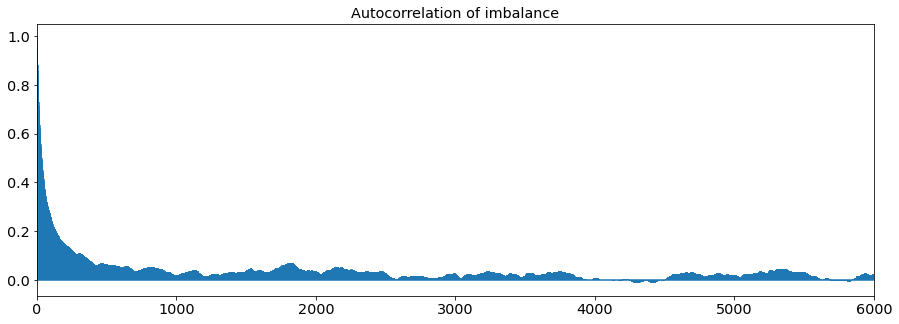

In [15]:
#What is autocorrelation of imbalance ??

plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

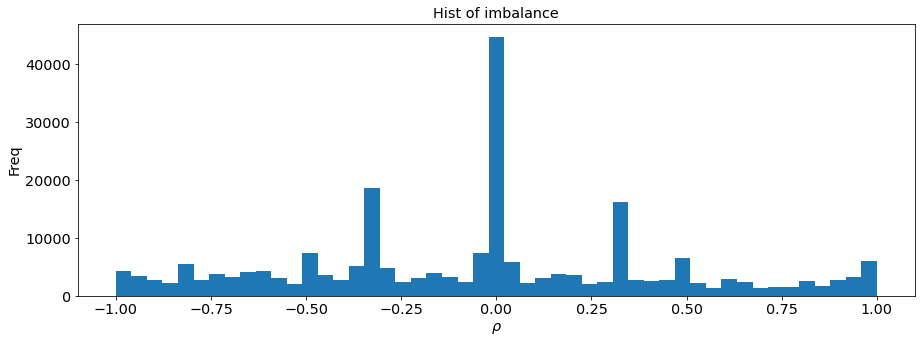

In [16]:
# plot a histogram of the imbalance??
# what does the histogram do here and above?

plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

The histogram , shows the mean value is -0.05,
most frequent values fall within 1 standard 

The standard deviation is 0.486,


where 
 is the total cash from trading, and the term 
 represents a penalty on holding terminal inventory (which we will send to infinity to guarantee liquidation).

## Volume Imbalance at times of Market Orders

In [17]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])

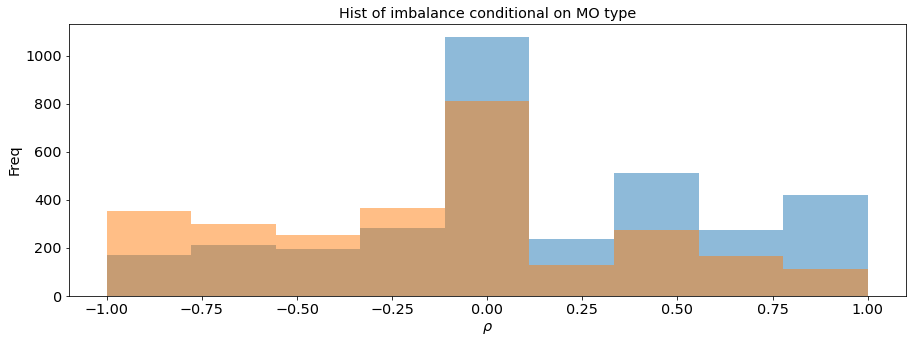

In [18]:
#figure out what this means

plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Hist of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

# 

# 

# Part 2 of CW

In [49]:
# Import necessary libraries.
import numpy as np
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

importing Jupyter notebook from Liquidation_Permanent_Price_Impact_helper.ipynb


In [58]:
# Parameter settings
T = 1
Ndt = 6.5 * 3600
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 0.01
b = 0.01

tau = T - t
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([0.0001, 0.001, 0.01, 0.1])
symb = np.array(["o", "*", "+", "^"])

alpha = 100

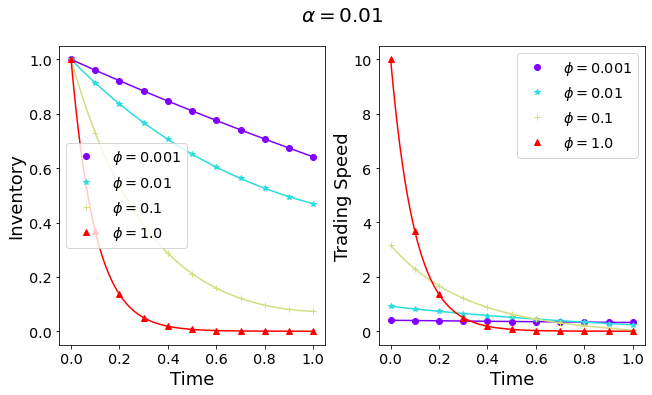

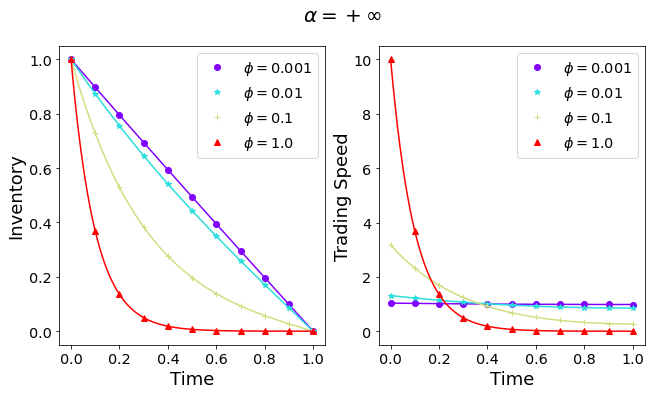

In [57]:
# Fig 6.2 of Page 148
lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
lppi_helpers.plot_inventory_trading_speed(100, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")

In [51]:
Ndt

23400.0

In [ ]:
# Parameter Settings
a = np.array([1, 0.8, 0.6])
k = 0.0001
b = 0.0001

phi = 10 * k
alpha = 100 * k
T = 1
qmax = 1

Ndt = 10000
Ndq = 100

dt = T / Ndt
dq = qmax / Ndq

In [ ]:
nus, Qs, myleg, t, q = lppi_helpers.solve_pde(T, dt, qmax, dq, k, a, b, alpha, phi, Ndt, Ndq)

In [ ]:
lppi_helpers.plot_multiple(t, nus.T, r"Time", r"Trading Speed $\nu^*_t$", None, myleg)

In [ ]:
# Fig 6.4 of Page 154
lppi_helpers.plot_multiple(t, Qs.T, r"Time", r"Inventory $Q_t^{\nu^*}$", None, myleg)